In [1]:
## 2016 Graphs
import os
import numpy as np

import datetime as dt

import netCDF4
from netCDF4 import Dataset, num2date

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import cmocean

from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
month = 1
year = 2016

netCDF_datestr = str(year)+'-'+format(month, '02')
print('File chosen time interval:',netCDF_datestr)

inputFile_bio = "https://thredds.ereefs.aims.gov.au/thredds/dodsC/ereefs/GBR4_H2p0_B3p1_Cq3b_Dhnd/daily-monthly/EREEFS_AIMS-CSIRO_GBR4_H2p0_B3p1_Cq3b_Dhnd_bgc_daily-monthly-"+netCDF_datestr+".nc"
inputFile_hydro = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"+netCDF_datestr+".nc"

File chosen time interval: 2016-01


In [3]:
nc_data_hydro = Dataset(inputFile_hydro, 'r')  # Reading the file on the server
nc_data_bio = Dataset(inputFile_bio, 'r')  #
print('Get the list of variable in the file:')
print(list(nc_data_hydro.variables.keys()))
print(list(nc_data_bio.variables.keys()))
#nc_data_hydro = nc_data_hydro.variables
#nc_data_bio = nc_data_bio.variables

Get the list of variable in the file:
['mean_cur', 'salt', 'temp', 'u', 'v', 'zc', 'time', 'latitude', 'longitude', 'mean_wspeed', 'eta', 'wspeed_u', 'wspeed_v']
['TOTAL_NITROGEN', 'alk', 'BOD', 'Chl_a_sum', 'CO32', 'DetBL_N', 'DetPL_N', 'DetR_N', 'DIC', 'DIN', 'DIP', 'DOR_C', 'DOR_N', 'DOR_P', 'Dust', 'EFI', 'FineSed', 'Fluorescence', 'HCO3', 'Kd_490', 'MPB_Chl', 'MPB_N', 'MPB_NR', 'Mud-carbonate', 'Mud-mineral', 'Nfix', 'NH4', 'NO3', 'omega_ar', 'Oxy_sat', 'Oxygen', 'P_Prod', 'PAR', 'PAR_z', 'pco2surf', 'PH', 'PhyL_Chl', 'PhyL_N', 'PhyL_NR', 'PhyS_Chl', 'PhyS_N', 'PhyS_NR', 'PIP', 'salt', 'TC', 'temp', 'TN', 'TP', 'Tricho_Chl', 'Tricho_N', 'Tricho_NR', 'Z_grazing', 'ZooL_N', 'ZooS_N', 'zc', 'time', 'latitude', 'longitude', 'CH_N', 'CS_bleach', 'CS_Chl', 'CS_N', 'EpiPAR_sg', 'eta', 'MA_N', 'MA_N_pr', 'month_EpiPAR_sg', 'R_400', 'R_410', 'R_412', 'R_443', 'R_470', 'R_486', 'R_488', 'R_490', 'R_510', 'R_531', 'R_547', 'R_551', 'R_555', 'R_560', 'R_590', 'R_620', 'R_640', 'R_645', 'R_665

In [4]:
nc_data_hydro['temp'].long_name

'Temperature'

In [5]:
nc_data_hydro['salt'].long_name

'Salinity'

In [6]:
nc_data_hydro['mean_cur'].long_name

'mean_current_speed'

In [7]:
nc_data_bio['PH'].long_name

'PH'

In [8]:
lat = nc_data_hydro['latitude'][:]
lon = nc_data_hydro['longitude'][:]

In [9]:
print('eReefs model spatial extent:\n')
print(' - Longitudinal extent:',lon.min(),lon.max())
print(' - Latitudinal extent:',lat.min(),lat.max())

eReefs model spatial extent:

 - Longitudinal extent: 142.168788 156.868788
 - Latitudinal extent: -28.696022 -7.036022


In [10]:
time_var = nc_data_hydro['time']

# Starting time
dtime = netCDF4.num2date(time_var[0],time_var.units)
daystr = dtime.strftime('%Y-%b-%d %H:%M')
print(' - start time: ',daystr,'\n')

# Ending time
dtime = netCDF4.num2date(time_var[-1],time_var.units)
daystr = dtime.strftime('%Y-%b-%d %H:%M')
print(' - end time: ',daystr,'\n')

ntime = len(time_var)

print(' - Number of time steps',ntime,'\n')

 - start time:  2015-Dec-31 14:00 

 - end time:  2016-Jan-30 14:00 

 - Number of time steps 31 



In [11]:
zc = nc_data_hydro['zc'][:]
nlay = len(zc)
for k in range(nlay):
    print(f'  + vertical layer {k} is at {zc[k]} m')

  + vertical layer 0 is at -145.0 m
  + vertical layer 1 is at -120.0 m
  + vertical layer 2 is at -103.0 m
  + vertical layer 3 is at -88.0 m
  + vertical layer 4 is at -73.0 m
  + vertical layer 5 is at -60.0 m
  + vertical layer 6 is at -49.0 m
  + vertical layer 7 is at -39.5 m
  + vertical layer 8 is at -31.0 m
  + vertical layer 9 is at -23.75 m
  + vertical layer 10 is at -17.75 m
  + vertical layer 11 is at -12.75 m
  + vertical layer 12 is at -8.8 m
  + vertical layer 13 is at -5.55 m
  + vertical layer 14 is at -3.0 m
  + vertical layer 15 is at -1.5 m
  + vertical layer 16 is at -0.5 m


In [38]:
## PH Graphs
selectedTimeIndex = 2    # we have 29 time records
selectedDepthIndex1 = -1   #almost the surface    
selectedDepthIndex = 7    #corals live around 30m deep in great barrier reef

In [41]:
print('Data range: ')
print(np.nanmin(nc_data_bio['PH'][selectedTimeIndex, selectedDepthIndex1, :,:]),
      np.nanmax(nc_data_bio['PH'][selectedTimeIndex, selectedDepthIndex1, :,:]))

Data range: 
6.462294 8.210004


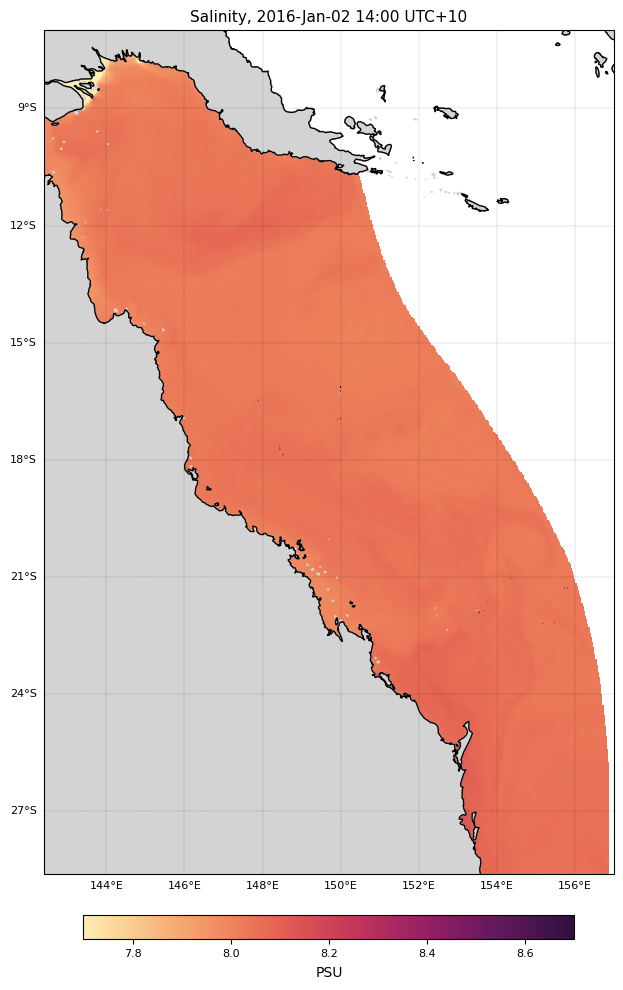

<Figure size 640x480 with 0 Axes>

In [50]:
# Used color
color = cmocean.cm.matter

# Variable range for the colorscale based on the range shown above
curlvl = [7.7,8.7]

# Vector field mapping information
veclenght = 0.5
vecsample = 50

# Figure size
size = (9, 10)

data = nc_data_bio['PH'][selectedTimeIndex, selectedDepthIndex1, :,:]

# Defining the figure
fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

# Axes with cartopy projection
ax = plt.axes(projection=ccrs.PlateCarree())
# and extent
ax.set_extent([142.4, 157, -7, -28.6], ccrs.PlateCarree())

# Ok now the map
cf = plt.pcolormesh(lon, lat, data, cmap=color, shading='auto',
                    vmin = curlvl[0], vmax = curlvl[1],
                    transform=ccrs.PlateCarree())

# Color bar
cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                    orientation="horizontal")
cbar.set_label(nc_data_bio[selectedVariable].units, rotation=0, 
               labelpad=5, fontsize=10)
cbar.ax.tick_params(labelsize=8)

# Title
dtime = netCDF4.num2date(time_var[selectedTimeIndex],time_var.units)
daystr = dtime.strftime('%Y-%b-%d %H:%M')
plt.title(nc_data_bio[selectedVariable].long_name+', %s UTC+10' % (daystr), 
          fontsize=11);

# Plot lat/lon grid 
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

# Add map features with Cartopy 
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='lightgray'))
ax.coastlines(linewidth=1)

plt.tight_layout()
plt.show()
fig.clear()
plt.close(fig)
plt.clf()


In [15]:
### def function

In [16]:
def eReefs_map(nc_data_hydro, tstep, depth, dataname, datalvl, color, size, 
               fname, vecsample, veclenght, vecscale, zoom=None, 
               show=False, vecPlot=False, save=False):
            # Get data
    data = nc_data_hydro[dataname][tstep, depth, :,:]
    
    fig = plt.figure(figsize=size, facecolor='w', edgecolor='k')

    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([142.4, 157, -7, -28.6], ccrs.PlateCarree())
    
    # Starting with the spatial domain
    lat = nc_data_hydro['latitude'][:]
    lon = nc_data_hydro['longitude'][:]
    cf = plt.pcolormesh(lon, lat, data, cmap=color, shading='auto',
                    vmin = datalvl[0], vmax = datalvl[1],
                    transform=ccrs.PlateCarree())
                    # Plot velocity arrows 
    if vecPlot:
        loni, lati = np.meshgrid(lon, lat)
        u = nc_data_hydro['u'][tstep, depth, :,:]
        v = nc_data_hydro['v'][tstep, depth, :,:]
                
        if zoom is not None:
            # find non zeros velocity points
            dataid = np.where(np.logical_and(data.flatten()>datalvl[0],
                                          data.flatten()<datalvl[1]))[0]
            
            lonid = np.where(np.logical_and(loni.flatten()>zoom[0],
                                          loni.flatten()<zoom[2]))[0]
            
            latid = np.where(np.logical_and(lati.flatten()>zoom[1],
                                          lati.flatten()<zoom[3]))[0]
            
            tmpid = np.intersect1d(lonid, latid)
            ind = np.intersect1d(tmpid, dataid)
        else:
            # find non zeros velocity points
            ind = np.where(np.logical_and(data.flatten()>datalvl[0],
                                          data.flatten()<datalvl[1]))[0]
        np.random.shuffle(ind)
        Nvec = int(len(ind) / vecsample)
        idv = ind[:Nvec]
        Q = plt.quiver(loni.flatten()[idv],
                       lati.flatten()[idv],
                       u.flatten()[idv],
                       v.flatten()[idv],
                       transform=ccrs.PlateCarree(), 
                       scale=vecscale)
        maxstr='%3.1f m/s' % veclenght
        qk = plt.quiverkey(Q,0.1,0.1,veclenght,maxstr,labelpos='S')


    # Color bar
    cbar = fig.colorbar(cf, ax=ax, fraction=0.027, pad=0.045, 
                        orientation="horizontal")
    cbar.set_label(nc_data_hydro[dataname].units, rotation=0, 
                   labelpad=5, fontsize=10)
    cbar.ax.tick_params(labelsize=8)
    

    # Title
    dtime = netCDF4.num2date(nc_data_hydro['time'][tstep],nc_data_hydro['time'].units)
    daystr = dtime.strftime('%Y-%b-%d %H:%M')
    plt.title(nc_data_hydro[dataname].long_name+', %s UTC+10' % (daystr), 
              fontsize=11);

    # Plot lat/lon grid 
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      linewidth=0.1, color='k', alpha=1, 
                      linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8} 
    
    # Add map features
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                                edgecolor='face', 
                                                facecolor='lightgray'))
    ax.coastlines(linewidth=1)

    if zoom is not None:
        plt.xlim(zoom[0],zoom[2])
        plt.ylim(zoom[1],zoom[3])
    
    if show:
        if save:
            plt.savefig(f"{fname}_time{tstep:04}_zc{depth:04}.png",dpi=300, 
                    bbox_inches='tight')
        plt.tight_layout()
        plt.show()
    else:
        plt.savefig(f"{fname}_time{tstep:04}_zc{depth:04}.png",dpi=300, 
                bbox_inches='tight')

    fig.clear()
    plt.close(fig)
    plt.clf()
    
    return

In [54]:
print(' ')
print('Temperature range: ')
print(np.nanmin(nc_data_hydro['temp'][selectedTimeIndex, selectedDepthIndex1, :,:]),
      np.nanmax(nc_data_hydro['temp'][selectedTimeIndex, selectedDepthIndex1, :,:]))

print(' ')
print('Salinity range: ')
print(np.nanmin(nc_data_hydro['salt'][selectedTimeIndex, selectedDepthIndex1, :,:]),
      np.nanmax(nc_data_hydro['salt'][selectedTimeIndex, selectedDepthIndex1, :,:]))

print(' ')
print('Current range: ')
print(np.nanmin(nc_data_hydro['mean_cur'][selectedTimeIndex, selectedDepthIndex1, :,:]),
      np.nanmax(nc_data_hydro['mean_cur'][selectedTimeIndex, selectedDepthIndex1, :,:]))

 
Temperature range: 
21.502571 32.314457
 
Salinity range: 
0.045024335 36.84403
 
Current range: 
0.0056367023 1.1582803


In [18]:
year = 2016

for k in range(12):
    
    netCDF_datestr = str(year)+'-'+format(k+1, '02')
    print('File chosen time interval:',netCDF_datestr)

    # GBR4 HYDRO
    inputFile = "http://thredds.ereefs.aims.gov.au/thredds/dodsC/s3://aims-ereefs-public-prod/derived/ncaggregate/ereefs/gbr4_v2/daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-"+netCDF_datestr+".nc"

    nc_data_hydro = Dataset(inputFile)


    selectedVariable = 'temp' # we pick Temperature
    selectedTimeIndex = 2   # we have 29 time records
    selectedDepthIndex1 = -1   #almost the surface    
    selectedDepthIndex = 7 

    print(np.nanmin(nc_data_hydro[selectedVariable][selectedTimeIndex, selectedDepthIndex1, :,:]),
          np.nanmax(nc_data_hydro[selectedVariable][selectedTimeIndex, selectedDepthIndex1, :,:]))

    # Vector field mapping information
    veclenght = 1.
    vecsample = 50
    vecscale = 20

    # Figure size
    size = (9, 10)

    # Used color
    color = cmocean.cm.thermal

    # Variable range for the colorscale
    curlvl = [24,29]

    # Saved file name
    fname = 'GBRtemp'+str(k)
    
    # Region to plot
    zoom = None

    # We now call the function
    eReefs_map(nc_data_hydro, selectedTimeIndex, selectedDepthIndex1, 
               selectedVariable, curlvl, color, size, fname, 
               vecsample, veclenght, vecscale, zoom, 
               show=False, vecPlot=False, save=True)

File chosen time interval: 2016-01
24.086714 34.30648
File chosen time interval: 2016-02
25.340107 33.210247
File chosen time interval: 2016-03
25.533186 34.070286
File chosen time interval: 2016-04
25.318771 32.46761
File chosen time interval: 2016-05
24.125786 31.957132
File chosen time interval: 2016-06
20.364872 30.999557
File chosen time interval: 2016-07
17.458096 28.551973
File chosen time interval: 2016-08
19.01901 29.419907
File chosen time interval: 2016-09
20.330444 29.574104
File chosen time interval: 2016-10
20.567944 30.781166
File chosen time interval: 2016-11
21.520947 30.940763
File chosen time interval: 2016-12
21.502571 32.314457


<Figure size 640x480 with 0 Axes>

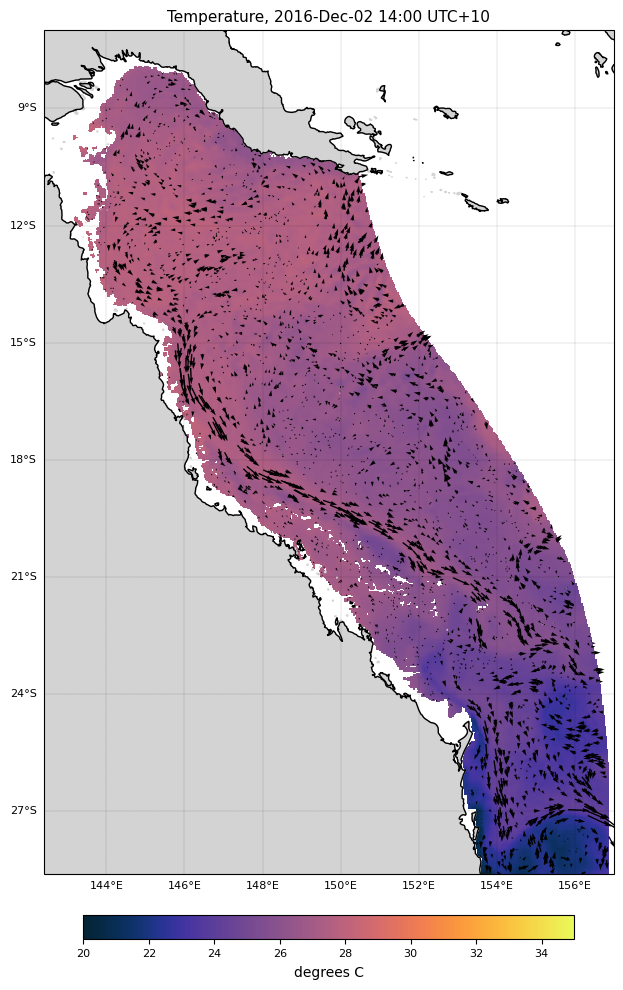

<Figure size 640x480 with 0 Axes>

In [20]:
# Used color
color = cmocean.cm.thermal

# Variable range for the colorscale
templvl = [20,35]

# Saved file name
fname = 'GBRtemperature'

# We now call the function
eReefs_map(nc_data_hydro, selectedTimeIndex, selectedDepthIndex, 
           'temp', templvl, color, size, fname, 
           vecsample, veclenght, vecscale, zoom, 
           show=True, vecPlot=True, save=False)

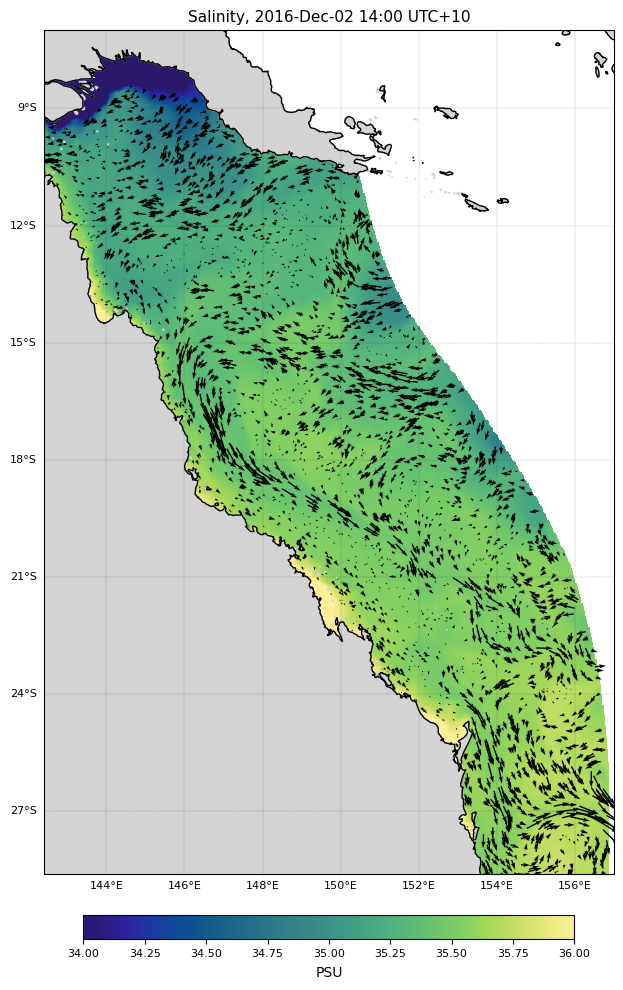

<Figure size 640x480 with 0 Axes>

In [37]:
# Used color
color = cmocean.cm.haline

# Variable range for the colorscale
templvl = [34,36]

# Saved file name
fname = 'GBRsalinity'

# We now call the function
eReefs_map(nc_data_hydro, selectedTimeIndex, selectedDepthIndex1, 
           'salt', templvl, color, size, fname, 
           vecsample, veclenght, vecscale, zoom, 
           show=True, vecPlot=True, save=False)

In [33]:
print(np.nanmin(nc_data_hydro[selectedVariable][selectedTimeIndex, selectedDepthIndex1, :,:]),
          np.nanmax(nc_data_hydro[selectedVariable][selectedTimeIndex, selectedDepthIndex1, :,:]))


0.045024335 36.84403


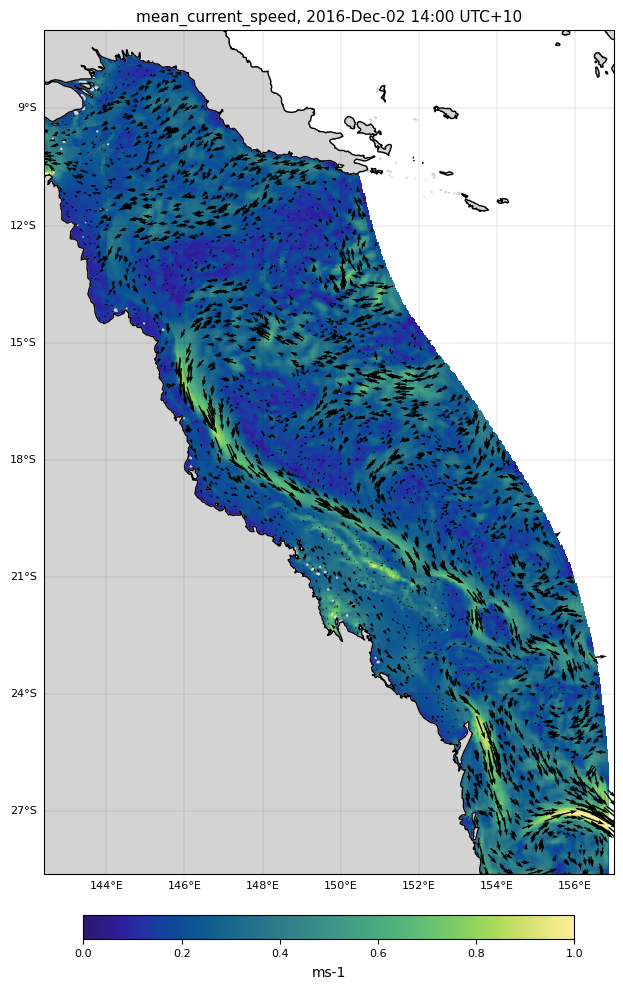

<Figure size 640x480 with 0 Axes>

In [55]:
# Used color
color = cmocean.cm.haline

# Variable range for the colorscale
templvl = [0,1]

# Saved file name
fname = 'GBRcurrent'

# We now call the function
eReefs_map(nc_data_hydro, selectedTimeIndex, selectedDepthIndex1, 
           'mean_cur', templvl, color, size, fname, 
           vecsample, veclenght, vecscale, zoom, 
           show=True, vecPlot=True, save=False)